## Cadiovascular diseases data description


The dataset consists of 70 000 records of patients data in 12 features, such as age, gender, systolic blood pressure, diastolic blood pressure, and etc. The target class "cardio" equals to 1, when patient has cardiovascular desease, and it's 0, if patient is healthy.

The task is to predict the presence or absence of cardiovascular disease (CVD) using the patient examination results. 

#### Data description



| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |





### note :
#####  the bmi variable I wil cnstract from  the given variables Weight and Height

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import rcParams
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import joblib

In [2]:
data = pd.read_csv('cardio_train.csv',sep=";")

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### drop the id column 

In [4]:
data.drop("id",axis=1,inplace=True)

In [5]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### creating the age by year

In [6]:
data['years'] = (data['age'] / 360).round().astype('int')

In [7]:
data.drop("age",axis=1,inplace=True)

In [8]:
data = data.rename(columns = {'years' : 'age'})

### Creating  the Body mass index (BMI) 

In [9]:
data["bmi"] = data["weight"] / (data["height"]/100)**2

In [10]:
data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age,bmi
0,2,168,62.0,110,80,1,1,0,0,1,0,51,21.967120
1,1,156,85.0,140,90,3,1,0,0,1,1,56,34.927679
2,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805
3,2,169,82.0,150,100,1,1,0,0,1,1,49,28.710479
4,1,156,56.0,100,60,1,1,0,0,0,0,49,23.011177


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       70000 non-null  int64  
 1   height       70000 non-null  int64  
 2   weight       70000 non-null  float64
 3   ap_hi        70000 non-null  int64  
 4   ap_lo        70000 non-null  int64  
 5   cholesterol  70000 non-null  int64  
 6   gluc         70000 non-null  int64  
 7   smoke        70000 non-null  int64  
 8   alco         70000 non-null  int64  
 9   active       70000 non-null  int64  
 10  cardio       70000 non-null  int64  
 11  age          70000 non-null  int32  
 12  bmi          70000 non-null  float64
dtypes: float64(2), int32(1), int64(10)
memory usage: 6.7 MB


In [12]:
data.isnull().sum()

gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age            0
bmi            0
dtype: int64

### Static Overview

In [13]:
data.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,54.077900,27.556513
std,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.858852,6.091511
min,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,3.471784
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,49.000000,23.875115
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,55.000000,26.374068
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,59.000000,30.222222
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,66.000000,298.666667


### visualizing of cases occurs according to the age 

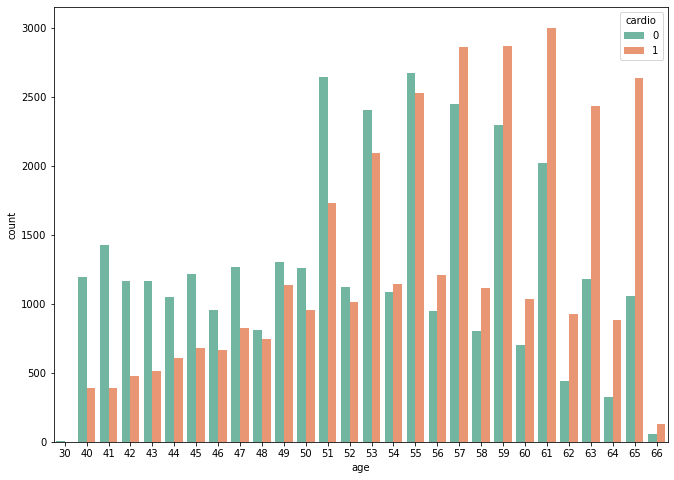

In [14]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='age', hue='cardio', data = data, palette="Set2");

### visualizing of cases occurs according to the gender

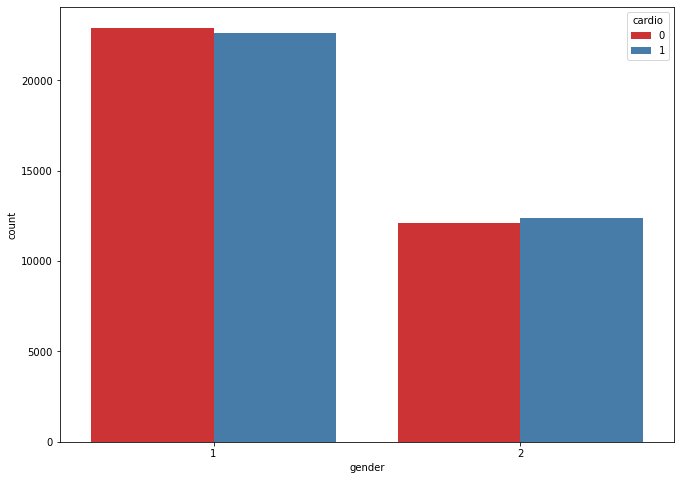

In [15]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='gender', hue='cardio', data = data, palette="Set1");

In [16]:
data.head()
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age,bmi
0,2,168,62.0,110,80,1,1,0,0,1,0,51,21.967120
1,1,156,85.0,140,90,3,1,0,0,1,1,56,34.927679
2,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805
3,2,169,82.0,150,100,1,1,0,0,1,1,49,28.710479
4,1,156,56.0,100,60,1,1,0,0,0,0,49,23.011177


### check the correlation between  gender and cardio

In [17]:
corr = data[['gender', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,gender,cardio
gender,1.000000,0.008109
cardio,0.008109,1.000000


### check the correlation between height and cardio

In [18]:
corr = data[['height', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,height,cardio
height,1.000000,-0.010821
cardio,-0.010821,1.000000


### check the correlation between weight and cardio

In [19]:
corr = data[['weight', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,weight,cardio
weight,1.000000,0.181660
cardio,0.181660,1.000000


### check the correlation between Systolic blood pressure and cardio

In [20]:
corr = data[['ap_hi', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,ap_hi,cardio
ap_hi,1.000000,0.054475
cardio,0.054475,1.000000


### check the correlation between Diastolic blood pressure and cardio 

In [21]:
corr = data[['ap_lo', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,ap_lo,cardio
ap_lo,1.000000,0.065719
cardio,0.065719,1.000000


### check the correlation between cholesterol and cardio

In [22]:
corr = data[['cholesterol', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,cholesterol,cardio
cholesterol,1.000000,0.221147
cardio,0.221147,1.000000


### check the correlation between Glucose and cardio

In [23]:
corr = data[['gluc', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,gluc,cardio
gluc,1.000000,0.089307
cardio,0.089307,1.000000


### check the correlation between age and cardio

In [24]:
corr = data[['age', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,age,cardio
age,1.000000,0.237622
cardio,0.237622,1.000000


### check the correlation between BMI and cardio

In [25]:
corr = data[['bmi', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,bmi,cardio
bmi,1.000000,0.165632
cardio,0.165632,1.000000


### How many Smokers and Non-Smokers

In [26]:
num = data["smoke"].value_counts("0")
num

0    0.911871
1    0.088129
Name: smoke, dtype: float64

In [27]:
num_ns = 70000 * 0.911871
num_s = 70000 * 0.088129

print(f"There are  {int(num_ns)}  Non-Smokers and  {int(num_s)}  Smokers in the data set.")

There are  63830  Non-Smokers and  6169  Smokers in the data set.


In [28]:
data.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age', 'bmi'],
      dtype='object')

## Pearson Correlation Coefficient & P-value

###  calculate the Pearson Correlation Coefficient and P-value of height and cardio

In [29]:
pearson_coef, p_value = stats.pearsonr(data['height'], data['cardio'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value); 

The Pearson Correlation Coefficient is -0.010821058331005287  with a P-value of P = 0.00419629881297999


### calculate the Pearson Correlation Coefficient and P-value of weight and cardio

In [30]:
pearson_coef, p_value = stats.pearsonr(data['weight'], data['cardio'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value); 

The Pearson Correlation Coefficient is 0.1816595617986255  with a P-value of P = 0.0


### calculate the Pearson Correlation Coefficient and P-value of Systolic blood pressure and cardio

In [31]:
pearson_coef, p_value = stats.pearsonr(data['ap_hi'], data['cardio'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value); 

The Pearson Correlation Coefficient is 0.0544750539268658  with a P-value of P = 3.6980921257728917e-47


### calculate the Pearson Correlation Coefficient and P-value of Diastolic blood pressure and cardio

In [32]:
pearson_coef, p_value = stats.pearsonr(data['ap_lo'], data['cardio'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value); 

The Pearson Correlation Coefficient is 0.06571869614918961  with a P-value of P = 7.424551291479402e-68


### calculate the Pearson Correlation Coefficient and P-value of Cholesterol and cardio

In [33]:
pearson_coef, p_value = stats.pearsonr(data['cholesterol'], data['cardio'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value); 

The Pearson Correlation Coefficient is 0.2211472739123976  with a P-value of P = 0.0


### calculate the Pearson Correlation Coefficient and P-value of Glucose and cardio

In [34]:
pearson_coef, p_value = stats.pearsonr(data['gluc'], data['cardio'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value); 

The Pearson Correlation Coefficient is 0.08930688732430286  with a P-value of P = 6.483042590508025e-124


## Machine Learning

### reorder the columns order of the dataframe

In [125]:
data.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'age', 'bmi', 'cardio'],
      dtype='object')

In [126]:
column_names = ['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active','age', 'bmi','cardio']

In [127]:
data = data.reindex(columns=column_names)

In [128]:
data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age,bmi,cardio
0,2,168,62.0,110,80,1,1,0,0,1,51,21.967120,0
1,1,156,85.0,140,90,3,1,0,0,1,56,34.927679,1
2,1,165,64.0,130,70,3,1,0,0,0,52,23.507805,1
3,2,169,82.0,150,100,1,1,0,0,1,49,28.710479,1
4,1,156,56.0,100,60,1,1,0,0,0,49,23.011177,0


### set X & y variables

In [129]:
X = data.drop('cardio', axis=1)
y = data['cardio']

### Split the data into train and test samples

In [130]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [131]:
y_train.value_counts()

1    28048
0    27952
Name: cardio, dtype: int64

In [132]:
y_test.value_counts()

0    7069
1    6931
Name: cardio, dtype: int64

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [134]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC()

}

In [45]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
    print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
    print(f'Testing F-1: {f1_score(y_test, y_pred)}')
    print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')
    print('-'*30)

Training Model LR 
--------------


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.7227142857142858
Testing Accuracy: 0.7175714285714285
Testing Confusion Matrix: 
[[5427 1642]
 [2312 4619]]
Testing Recall: 0.6664262011253788
Testing Precesion: 0.7377415748283022
Testing F-1: 0.7002728926622195
Testing F-Beta: 0.7222830336200156
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.7812857142857143
Testing Accuracy: 0.6863571428571429
Testing Confusion Matrix: 
[[5022 2047]
 [2344 4587]]
Testing Recall: 0.6618092627326504
Testing Precesion: 0.6914380464274947
Testing F-1: 0.676299299668264
Testing F-Beta: 0.6853019392237129
------------------------------
Training Model DT 
--------------
Training Accuracy: 0.9783214285714286
Testing Accuracy: 0.6345
Testing Confusion Matrix: 
[[4624 2445]
 [2672 4259]]
Testing Recall: 0.6144856442071851
Testing Precesion: 0.6352923627684964
Testing F-1: 0.6247158049138247
Testing F-Beta: 0.6310190535455004
------------------------------
Training Model RF 
--------------
Training A

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training Accuracy: 0.7665892857142858
Testing Accuracy: 0.7295714285714285
Testing Confusion Matrix: 
[[5459 1610]
 [2176 4755]]
Testing Recall: 0.6860481892944741
Testing Precesion: 0.7470542026708562
Testing F-1: 0.7152527075812274
Testing F-Beta: 0.7340001852366397
------------------------------
Training Model Naive Bayes 
--------------
Training Accuracy: 0.5950714285714286
Testing Accuracy: 0.5963571428571428
Testing Confusion Matrix: 
[[6230  839]
 [4812 2119]]
Testing Recall: 0.3057278891934786
Testing Precesion: 0.7163624070317782
Testing F-1: 0.4285569825058146
Testing F-Beta: 0.564675158556734
------------------------------
Training Model SVC 
--------------
Training Accuracy: 0.7215357142857143
Testing Accuracy: 0.7186428571428571
Testing Confusion Matrix: 
[[5773 1296]
 [2643 4288]]
Testing Recall: 0.6186697446255951
Testing Precesion: 0.7679083094555874
Testing F-1: 0.6852576907710747
Testing F-Beta: 0.7325656883179007
------------------------------


#### as we see the xgboost gives best Testing Accuracy

In [135]:
model = XGBClassifier()
x_train = np.array(x_train)
model.fit(x_train, y_train)

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:38:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [136]:
y_test

10840    0
56267    0
14849    0
62726    0
47180    0
        ..
29357    1
52488    0
9603     1
34949    0
25193    1
Name: cardio, Length: 14000, dtype: int64

In [137]:
y_pred = model.predict(x_test)

In [138]:
pd.DataFrame(y_pred)

,0
0,0
1,0
2,0
3,0
4,0
...,...
13995,1
13996,0
13997,1
13998,0


In [139]:
import os
os.chdir(r'C:\Users\dell\Desktop\test the model')

In [140]:
joblib.dump(model, 'model.h5')

['model.h5']

In [141]:
x_test

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age,bmi
10840,1,165,61.0,120,80,1,1,0,0,1,42,22.405877
56267,1,164,54.0,110,80,1,1,0,0,1,55,20.077335
14849,1,170,69.0,120,80,1,1,0,0,1,57,23.875433
62726,1,167,57.0,110,70,1,1,0,0,1,46,20.438166
47180,1,158,110.0,120,80,1,1,0,0,0,40,44.063451
...,...,...,...,...,...,...,...,...,...,...,...,...
29357,1,156,100.0,160,100,3,3,0,1,1,61,41.091387
52488,1,166,80.0,100,60,1,1,0,0,1,49,29.031790
9603,2,120,68.0,150,1000,2,1,0,0,0,62,47.222222
34949,2,169,79.0,120,80,1,1,1,0,1,41,27.660096


In [146]:
s = [1,156,85.0,140,90,3,1,0,0,1,56,34.927679]
o = model.predict([s])

In [147]:
o

array([1], dtype=int64)